In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import models
import importlib
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from matplotlib import pyplot as plt

In [119]:
importlib.reload(models)

<module 'models' from '/Users/varun/School/CS182/finalproj/CS182-Spring2020-NLP-Project/models.py'>

In [3]:
df = pd.read_csv("dataset-binary.csv")
df = df.dropna()

In [4]:
training_reviews, training_stars, test_reviews, test_stars = models.get_fit_samples(df, 4000)

In [56]:
model, history = models.kaggle_model(5, training_reviews, test_reviews, training_stars, test_stars)

Train on 3200 samples, validate on 800 samples
Epoch 1/5
3200/3200 - 70s - loss: 0.4739 - accuracy: 0.7976 - val_loss: 0.4310 - val_accuracy: 0.8143
Epoch 2/5
3200/3200 - 58s - loss: 0.4306 - accuracy: 0.8163 - val_loss: 0.3961 - val_accuracy: 0.8413
Epoch 3/5
3200/3200 - 58s - loss: 0.3848 - accuracy: 0.8415 - val_loss: 0.3411 - val_accuracy: 0.8625
Epoch 4/5
3200/3200 - 59s - loss: 0.3530 - accuracy: 0.8543 - val_loss: 0.3230 - val_accuracy: 0.8650
Epoch 5/5
3200/3200 - 58s - loss: 0.3295 - accuracy: 0.8639 - val_loss: 0.3055 - val_accuracy: 0.8715


In [233]:
rand_test = models.test_on_random_subset(10000, list(df["text"]), list(df["stars"]), 
                                         training_reviews, 5000, 200, model)

In [133]:
corr = 0
indices = []
for i in range(100):
    if rand_test[0][i] == rand_test[1][i]:
        corr += 1
    else:
        indices.append(i)
corr / 100

0.71

In [134]:
avg_len_corr = 0
avg_len_incorr = 0
for i in range(1000):
    if i in indices:
        avg_len_incorr += len(rand_test[2][i])
    else:
        avg_len_corr += len(rand_test[2][i])
avg_len_corr /= 1000 - len(indices)
avg_len_incorr /= len(indices)

In [135]:
avg_len_corr

661.2677651905252

In [136]:
avg_len_incorr

649.2413793103449

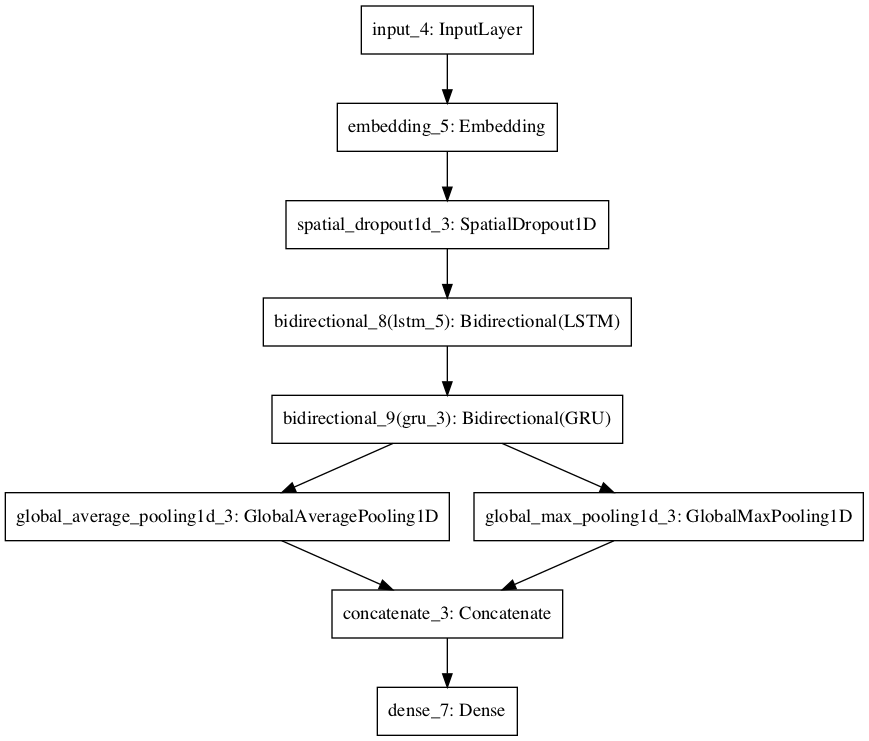

In [46]:
tf.keras.utils.plot_model(model, to_file = 'model.png')

In [37]:
model.save("model.h5")

In [43]:
model = None

In [5]:
model = tf.keras.models.load_model("model.h5")

In [47]:
train.to_csv("dataset-binary.csv")

In [48]:
traing = pd.read_csv("dataset-binary.csv")

In [65]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 5000, oov_token = '<OOV>')
tokenizer.fit_on_texts(training_reviews)

test_sequences = tokenizer.texts_to_sequences(list(df["text"])[25000:29000])
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen = 200, padding = 'post', truncating = 'post')

In [66]:
x = model.evaluate(test_padded, df[16000:20000][["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values)

4000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [45]:
x = model.predict([test_padded])

In [26]:
gt_stars = [np.argmax(i) + 1 for i in df[16000:20000][["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values]

In [36]:
x_out = [np.argmax(i) + 1 for i in x]

In [39]:
corr = 0
for i in range(4000):
    if gt_stars[i] == x_out[i]:
        corr += 1
corr / 4000

0.36

In [126]:
models.test_on_random_subset(100000, df["text"], df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values, training_reviews, 5000, 200, model)

0.8855625

In [120]:
training_reviews, training_stars, test_reviews, test_stars = models.get_fit_samples_perturbed(df, 4000)

In [121]:
model, history = models.model_extra_fit(model, 5, training_reviews, test_reviews, training_stars, test_stars)

Train on 3200 samples, validate on 800 samples
Epoch 1/5
3200/3200 - 90s - loss: 0.3936 - accuracy: 0.8346 - val_loss: 0.3391 - val_accuracy: 0.8585
Epoch 2/5
3200/3200 - 84s - loss: 0.3470 - accuracy: 0.8609 - val_loss: 0.3008 - val_accuracy: 0.8845
Epoch 3/5
3200/3200 - 80s - loss: 0.3093 - accuracy: 0.8757 - val_loss: 0.2762 - val_accuracy: 0.8952
Epoch 4/5
3200/3200 - 80s - loss: 0.2796 - accuracy: 0.8911 - val_loss: 0.2876 - val_accuracy: 0.8908
Epoch 5/5
3200/3200 - 86s - loss: 0.2545 - accuracy: 0.9014 - val_loss: 0.2546 - val_accuracy: 0.9055


In [90]:
model.save("model.h5")

In [142]:
list(tokenizer.word_index.keys())[300:400]

['pay',
 'thought',
 'anything',
 'rude',
 'however',
 'coffee',
 'waiting',
 'everyone',
 "you're",
 'having',
 'review',
 'places',
 'half',
 'quick',
 'tell',
 'able',
 'later',
 'stars',
 '30',
 'wonderful',
 'side',
 'decided',
 'table',
 'far',
 'worst',
 'friends',
 'salad',
 'felt',
 'weeks',
 'selection',
 'end',
 'guy',
 'hotel',
 'water',
 'atmosphere',
 'less',
 'point',
 'months',
 'meal',
 'let',
 'its',
 'during',
 'high',
 'sauce',
 'free',
 'thanks',
 "won't",
 'needs',
 '15',
 'vegas',
 'someone',
 'cut',
 'overall',
 'line',
 'door',
 'open',
 'deal',
 'looked',
 'taste',
 'friend',
 'return',
 '20',
 'trying',
 'finally',
 'disappointed',
 'walked',
 'full',
 'until',
 'couple',
 'fries',
 'ok',
 'fun',
 'keep',
 '6',
 "i'll",
 'name',
 'quite',
 'received',
 'doing',
 'items',
 'dinner',
 'wrong',
 'least',
 'almost',
 'buy',
 'usually',
 'drinks',
 'busy',
 "doesn't",
 'close',
 'walk',
 'star',
 'drive',
 'kids',
 'ago',
 'rice',
 'sweet',
 'stop',
 'change',
 'h

In [98]:
x = list(tokenizer.word_index.keys())

In [128]:
"elite" in x

True

In [115]:
perturbations

{'great': ['admirable',
  'awesome',
  'best',
  'exceptional',
  'fantastic',
  'perfect',
  'positive',
  'terrific',
  'wonderful',
  'tremendous'],
 'good': ['acceptable',
  'excellent',
  'exceptional',
  'favorable',
  'great',
  'marvelous',
  'positive',
  'satisfactory',
  'satisfying'],
 'service': ['assistance', 'duty', 'maintenance'],
 'food': ['cuisine', 'drink', 'meal', 'meat', 'snack', 'bite']}

In [130]:
df2 = pd.read_csv("dataset.csv")
num1 = [i for i in df2["stars"] if i == 1]

In [131]:
len(num1)

129878

In [132]:
num1 = [i for i in df2["stars"] if i == 1]
num2 = [i for i in df2["stars"] if i == 2]
num3 = [i for i in df2["stars"] if i == 3]
num4 = [i for i in df2["stars"] if i == 4]
num5 = [i for i in df2["stars"] if i == 5]